<a href="https://colab.research.google.com/github/Binaaa04/DataScience_Intern/blob/main/Data_Sains_Modul9_Sabrina_Rahmadini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Link : https://colab.research.google.com/drive/1zn1OWeimUqGkXP1vaSboHibhuthqZUCO?usp=sharing

Dataset yang saya gunakan pada percobaan ini adalah Mall Customers Segmentation Data, yang berisi informasi mengenai pelanggan di sebuah pusat perbelanjaan (mall). Dataset ini termasuk ke dalam data terstruktur karena setiap atributnya memiliki format dan nilai yang terdefinisi dengan jelas. Secara umum, dataset ini berisi beberapa kolom penting seperti CustomerID, Gender, Age, Annual Income (k$), dan Spending Score (1–100). Atribut Annual Income menunjukkan tingkat pendapatan tahunan pelanggan, sedangkan Spending Score menggambarkan kebiasaan pelanggan dalam mengeluarkan uang di mall berdasarkan perilaku belanja dan faktor sosial. Tujuan dari analisis ini adalah untuk melakukan segmentasi pelanggan menggunakan algoritma K-Means Clustering, agar dapat mengelompokkan pelanggan ke dalam beberapa grup yang memiliki karakteristik mirip satu sama lain.


In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/MAGANG/DATA SCIENCE/Mall_Customers.csv')
df.head()
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# scikit-learn
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
df = pd.read_csv('/content/drive/MyDrive/MAGANG/DATA SCIENCE/Mall_Customers.csv')

# 3.3 Encode Gender
if 'Gender' in df.columns:
    le = LabelEncoder()
    df['Gender_n'] = le.fit_transform(df['Gender'])  # Female=0, Male=1 (cek mapping dengan le.classes_)

# 3.4 Pilih fitur untuk clustering
# Rekomendasi awal: Age, Annual Income (k$), Spending Score (1-100)
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = df[features].copy()

# 3.5 Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Tampilkan ringkasan
X.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


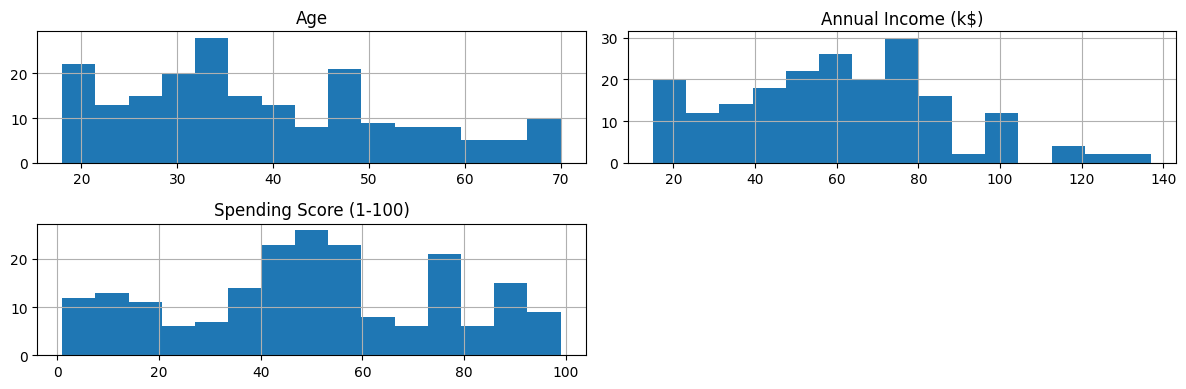

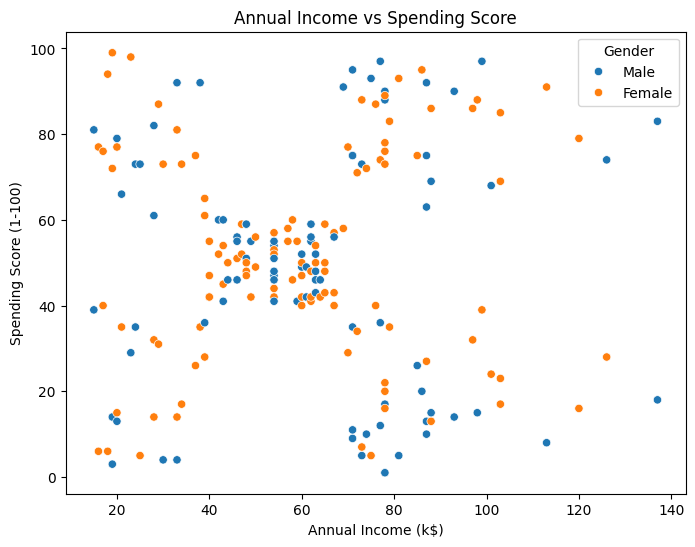

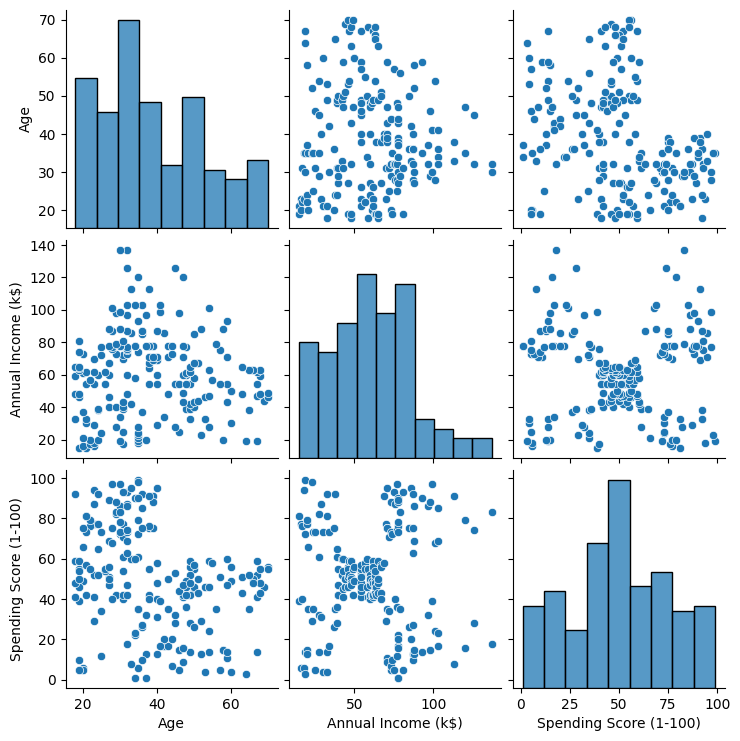

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# scikit-learn
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
df = pd.read_csv('/content/drive/MyDrive/MAGANG/DATA SCIENCE/Mall_Customers.csv')

# 3.3 Encode Gender
if 'Gender' in df.columns:
    le = LabelEncoder()
    df['Gender_n'] = le.fit_transform(df['Gender'])  # Female=0, Male=1 (cek mapping dengan le.classes_)

# 3.4 Pilih fitur untuk clustering
# Rekomendasi awal: Age, Annual Income (k$), Spending Score (1-100)
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = df[features].copy()

# 3.5 Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Histogram tiap fitur
X.hist(bins=15, figsize=(12,4))
plt.tight_layout()
plt.show()
print()

# Scatter plot: Annual Income vs Spending Score
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender')
plt.title('Annual Income vs Spending Score')
plt.show()
print()

sns.pairplot(df[features + (['Gender'] if 'Gender' in df.columns else [])])
plt.show()
print()


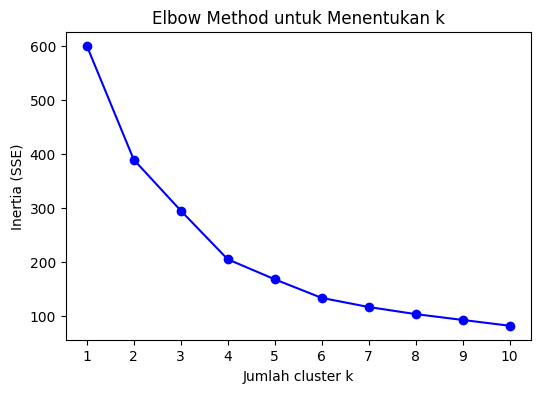


Silhouette score: 0.41664341513732767



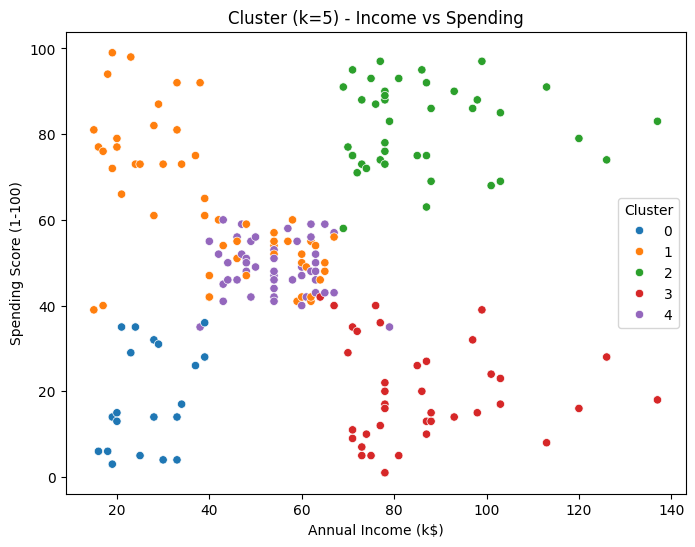

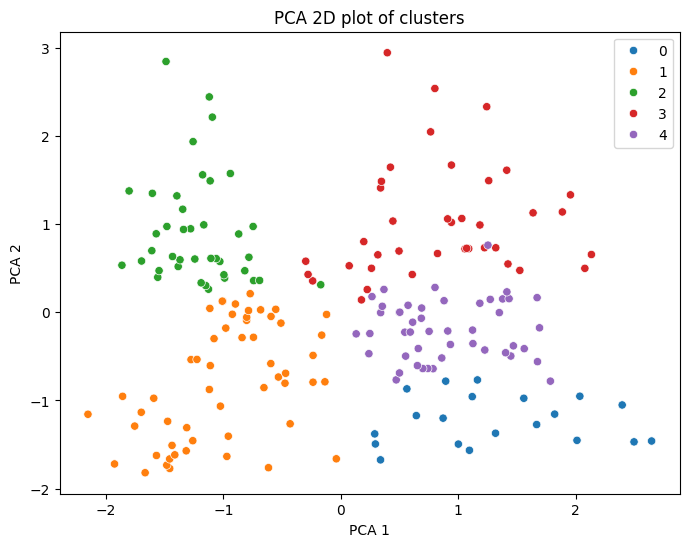

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# scikit-learn
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
df = pd.read_csv('/content/drive/MyDrive/MAGANG/DATA SCIENCE/Mall_Customers.csv')

# 3.3 Encode Gender
if 'Gender' in df.columns:
    le = LabelEncoder()
    df['Gender_n'] = le.fit_transform(df['Gender'])  # Female=0, Male=1 (cek mapping dengan le.classes_)

# 3.4 Pilih fitur untuk clustering
# Rekomendasi awal: Age, Annual Income (k$), Spending Score (1-100)
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = df[features].copy()

# 3.5 Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertia = []
K = range(1,11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Jumlah cluster k')
plt.ylabel('Inertia (SSE)')
plt.title('Elbow Method untuk Menentukan k')
plt.xticks(K)
plt.show()
print()

k_best = 5  # ganti kalau Elbow menunjukkan k lain
kmeans = KMeans(n_clusters=k_best, random_state=42, n_init=50)
labels = kmeans.fit_predict(X_scaled)

# Tambahkan label ke df
df['cluster'] = labels

# Silhouette score (rentang -1 sampai 1, semakin dekat ke 1 semakin baik)
sil_score = silhouette_score(X_scaled, labels)
print("Silhouette score:", sil_score)
print()

# Visual 1: Income vs Spending (jika kedua ada)
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='cluster', palette='tab10')
plt.title(f'Cluster (k={k_best}) - Income vs Spending')
plt.legend(title='Cluster')
plt.show()
print()

# Visual 2: PCA 2D (umum untuk 3 fitur)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels, palette='tab10')
plt.title('PCA 2D plot of clusters')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

Dari hasil visualisasi, terlihat bahwa lima cluster yang terbentuk menggambarkan kelompok pelanggan dengan karakteristik yang berbeda. Misalnya, ada satu cluster berisi pelanggan dengan pendapatan tinggi dan pengeluaran tinggi — kelompok ini bisa disebut sebagai pelanggan “premium”, yang cenderung royal berbelanja dan memiliki potensi besar untuk menjadi target utama promosi eksklusif atau program loyalitas VIP. Kemudian ada cluster dengan pendapatan tinggi tetapi pengeluaran rendah, yang menunjukkan pelanggan berdaya beli tinggi namun belum termotivasi untuk berbelanja lebih banyak. Dari sisi bisnis, segmen ini bisa menjadi target untuk strategi upselling atau personalized marketing yang bisa mendorong mereka agar lebih aktif berbelanja.

Selain itu, ada juga cluster yang berisi pelanggan berpendapatan menengah dan pengeluaran sedang, yang bisa dikategorikan sebagai kelompok pelanggan reguler. Mereka biasanya menjadi tulang punggung pendapatan mall karena jumlahnya besar, sehingga strategi retensi seperti diskon musiman atau penawaran paket bisa diarahkan ke kelompok ini. Sementara itu, cluster dengan pendapatan dan pengeluaran rendah menggambarkan pelanggan yang lebih sensitif terhadap harga. Untuk segmen ini, pihak mall bisa fokus pada program promosi massal atau kampanye diskon agar tetap menarik minat mereka tanpa harus mengorbankan margin keuntungan terlalu besar.

Dari hasil PCA 2D plot juga terlihat bahwa kelima cluster tersebut memiliki batas yang cukup jelas, meskipun ada sedikit tumpang tindih antar kelompok — hal ini wajar karena perilaku belanja manusia sering kali tumpang tindih dan tidak bisa dipisahkan secara mutlak. Namun secara keseluruhan, hasil clustering ini sudah memberikan gambaran yang kuat bahwa pelanggan mall memiliki karakteristik yang beragam, dan setiap segmen membutuhkan pendekatan pemasaran yang berbeda.

Melihat dari sisi bisnis, hasil segmentasi ini bisa dimanfaatkan untuk menyusun strategi promosi yang lebih tepat sasaran. Misalnya, segmen premium bisa diberikan pengalaman berbelanja yang lebih personal dan eksklusif, sedangkan segmen berpendapatan rendah bisa difokuskan pada promosi harga atau program diskon. Dengan memahami kebutuhan dan perilaku tiap kelompok, pihak mall bisa meningkatkan efektivitas kampanye pemasaran, menghemat biaya promosi, dan pada akhirnya meningkatkan loyalitas pelanggan serta pendapatan keseluruhan.

Dari keseluruhan proses yang saya lakukan, saya menyimpulkan bahwa penggunaan model K-Means Clustering pada dataset pelanggan mall ini tidak hanya memberikan pemahaman secara teknis, tetapi juga menghasilkan insight bisnis yang nyata. Hasilnya menunjukkan bahwa data pelanggan bisa dimanfaatkan secara strategis untuk memperkuat keputusan pemasaran dan membangun hubungan jangka panjang dengan pelanggan. Jadi, analisis ini bukan hanya sekadar pengelompokan angka, tapi juga menjadi alat penting dalam memahami perilaku konsumen dan menciptakan nilai bisnis yang lebih besar bagi perusahaan.